In [155]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [156]:
# Load .env enviroment variables
load_dotenv()

True

In [157]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [158]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [159]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39961.20
The current value of your 5.3 ETH is $5159.55


In [160]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [161]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [162]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.index = df_portfolio.index.date

In [163]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.1
Current SPY closing price: $371.93


In [164]:
# Compute the current value of shares
my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5905.00
The current value of your 200 AGG shares is $74386.00


In [165]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

df_index = pd.MultiIndex(levels=[['crypto', 'shares']], codes=[[0, 1]])
df_savings = pd.DataFrame(index=df_index, columns=['amount'], data=[[crypto_value], [shares_value]])

# Display savings DataFrame
display(df_savings)

,amount
crypto,45120.75
shares,80291.00


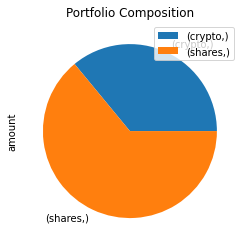

In [166]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [167]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_value = crypto_value + shares_value
savings_difference = emergency_fund - savings_value

# Validate saving health
if savings_value >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
else:
    print(f"Unfortunately, you are short of your emergency fund goal by the following amount: ${savings_difference:0.2f}")

Congratulations! You have enough money in your emergency fund


In [168]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [178]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                         SPY          \
              open      high      low   close   volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [179]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_thirtyyear.portfolio_data.head()

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [180]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999157,0.995197,1.001253,0.996423,1.013595,0.989182,1.002101,1.003148,1.002719,1.002086,...,0.999398,1.003494,0.993223,0.998875,1.007308,1.006985,0.994552,1.011966,1.001316,1.001908
2,0.997917,1.002501,1.008304,0.995893,1.015227,0.992745,0.993870,0.998587,1.017072,1.006280,...,0.992900,1.007378,0.983890,1.013126,1.003506,0.999351,0.994778,1.003803,0.988566,0.995182
3,1.011162,0.996722,1.022445,1.007340,1.019217,0.996446,0.997928,0.996897,1.026485,1.009581,...,0.983557,1.001766,0.992016,0.996903,1.000970,1.002111,0.989981,1.012818,0.988073,1.001466
4,1.011222,0.999748,1.033125,1.007279,1.019330,0.997710,1.000649,0.991969,1.024352,0.998919,...,0.977742,1.004080,0.992370,0.980151,0.996863,1.007156,0.981764,1.011581,1.004106,0.996992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.761643,7.293971,12.187373,8.222815,6.290905,9.996862,5.150593,7.400973,4.114492,5.065629,...,19.789794,12.167246,9.628874,8.038819,8.255512,20.955040,8.616579,5.644176,8.885410,9.983226
7557,15.687157,7.239147,12.158634,8.322322,6.264936,10.069700,5.124347,7.412588,4.100132,5.054070,...,19.858911,12.247498,9.650233,8.138846,8.317860,20.856503,8.651934,5.681493,8.834802,9.897184
7558,15.656181,7.149652,12.279694,8.391572,6.328326,10.222275,5.067161,7.425540,4.050733,5.035689,...,19.983293,12.320387,9.581671,8.076777,8.188119,20.722958,8.730045,5.666721,8.762359,9.817637
7559,15.533716,7.126446,12.391734,8.353373,6.338695,10.245206,5.049348,7.473865,4.081991,5.059394,...,20.044639,12.197856,9.589440,8.078819,8.179952,20.624949,8.700443,5.715047,8.779279,9.867766


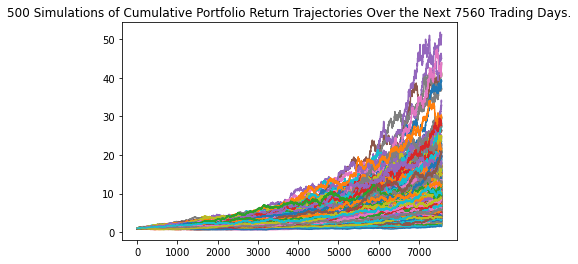

In [181]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

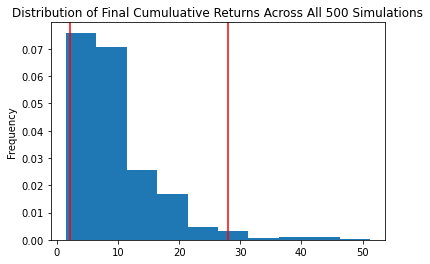

In [182]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [183]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.704895
std               7.041103
min               1.465114
25%               5.057839
50%               7.819932
75%              12.189555
max              51.241927
95% CI Lower      2.187553
95% CI Upper     27.944549
Name: 7560, dtype: float64


In [184]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43751.05 and $558890.98


In [185]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65626.58 and $838336.47


In [ ]:
#done